In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:

data = pd.read_csv('Telco-Customer-Churn.csv')

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:


data.drop('customerID', axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

X = data.drop('Churn', axis=1)
y = data['Churn']

X = pd.get_dummies(X)

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[num_cols] = scaler.fit_transform(X[num_cols])

print(X.shape, y.shape)


(7043, 45) (7043,)


C:\Users\ASLAM\AppData\Local\Temp\ipykernel_3708\264286568.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

print(X_train.shape, X_test.shape)


(5634, 45) (1409, 45)


In [25]:


model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [26]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2944      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)


Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4930 - accuracy: 0.7550 - val_loss: 0.4462 - val_accuracy: 0.7995
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.7943 - val_loss: 0.4412 - val_accuracy: 0.7924
Epoch 3/20
141/141 [==============================] - 1s 5ms/step - loss: 0.4265 - accuracy: 0.7919 - val_loss: 0.4419 - val_accuracy: 0.7844
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8052 - val_loss: 0.4399 - val_accuracy: 0.7897
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4194 - accuracy: 0.8045 - val_loss: 0.4380 - val_accuracy: 0.7915
Epoch 6/20
141/141 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8036 - val_loss: 0.4376 - val_accuracy: 0.7897
Epoch 7/20
141/141 [==============================] - 1s 5ms/step - loss: 0.4179 - accuracy: 0.8072 - val_loss: 0.4375 - val_accuracy: 0.7977
Epoch 

In [ ]:

y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)


45/45 [==============================] - 0s 2ms/step


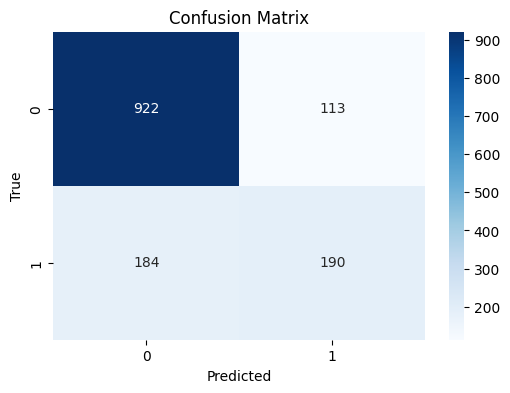

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1035
         1.0       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



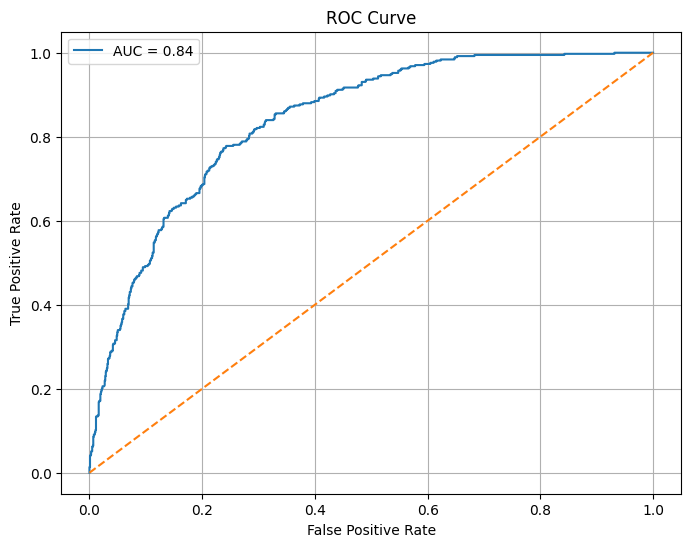

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
